#### Use linear regression to predict wine quality
In this notebook we will examine the application of linear regression algorithms to predict wine quality for variables that's not part of the existing dataset.

The wine_quality_white.csv file contains data compiled by wine tasters where the quality of the wine is evaluated based on the variables such as density, alcohol, acidity.
- density : Shows the amount of material dissolved in the wine.
- alcohol : The alcohol content of the wine
- quality : The average quality rating (1-10) given to the wine.

Here's the first few rows of the dataset.

In [42]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

wine_data = pd.read_csv("wine_quality_white.csv")
wine_data.head(3)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6


Before we get started on linear regression, let's look at the theory of lines.
A simple line is 
\begin{align*}
y=mx
\end{align*}

_Where m is the slope of the line_

##### Instructions
- Plot the equation y=x, using the existing x variable.

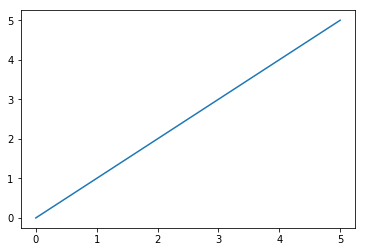

In [43]:
import numpy as np
x = [0, 1, 2, 3, 4, 5]
y = [0, 1, 2, 3, 4, 5]

plt.plot(x,y)
plt.show()

From the above plot, every point on the y axis is the same as every point on the x axis, and the slope of the line is 1, i.e for a unit change on the x axis in the +ve direction results in a unit change in the vertical direction on the y axis.
##### Instructions
- Plot the equation y=x−1, using the existing x variable.
- Plot the equation y=x+10, using the existing x variable.

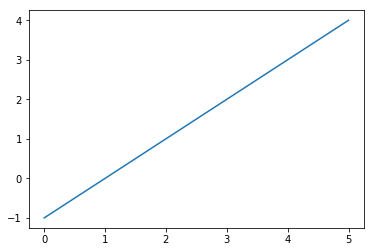

In [44]:
x = np.asarray([0, 1, 2, 3, 4, 5])
y = x - 1
plt.plot(x, y)
plt.show()

From the above equation, the slope is 1 and the y intercept is -1, which means that when x = 0, the y value will be -1. 


In the next code blocks we will look at slopes that are greater than 1
#### Instructions

- Plot the equation y=4x, using the existing x variable.
- Plot the equation y=.5x, using the existing x variable.
- Plot the equation y=−2x, using the existing x variable.

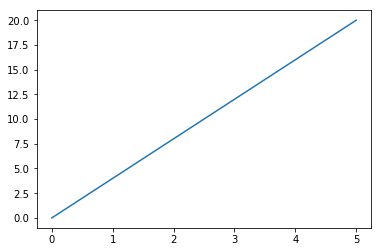

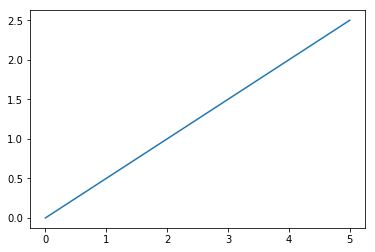

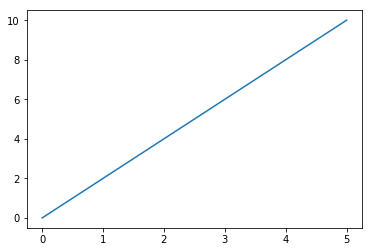

In [45]:
x = np.asarray([0, 1, 2, 3, 4, 5])
y = 4*x

plt.plot(x,y)
plt.show()

y = .5*x
plt.plot(x,y)
plt.show()

y = 2*x
plt.plot(x,y)
plt.show()

### Correlation and Prediction
The correlation coefficient i.e. the r-value is an indicator of how correlated two variables are, the values of the r-value can range from -1 to 1. Where -1 indicates a -ve correlation and a 1 represents a +ve correlation, a value of 0 means that the two variables do not have any correlation whatsoever.

The stronger the correlation coefficient between the two variables, the easier it is to predict one variable if we know the value of the other. For instance, If I know how much I pay for carrots in a grocery store is highly positively correlated to the weight of the carrots (in pounds), I can create a formula that helps me predict how much I would be paying for the carrots.

The equation to create the formula takes the form 

\begin{equation*}
{y} = {mx+b}
\end{equation*}
_Where m is the slope and b is the intercept_

We'll have to calculate values of m and b before we can use the formula.

The formula for the slope m  is 

\begin{equation*}
{m} = {cov(x,y)}/{\sigma^2 x}
\end{equation*}

_Which is just the covariance of x and y divided by the variance of x._
We can use the cov function in numpy to calculate the covariance and the .var() method on Pandas series to calculate variance. 

#### Instructions
- Calculate the slope you would need to predict the "quality" column (y) using the "density" column (x).
- Assign the slope to slope_density

In [46]:
covar = np.cov(wine_data["density"], wine_data["quality"])[0, 1]
print("Covariance of the density and quality columns is {}".format(covar))
r_value = covar/(wine_data["density"].std()*wine_data["quality"].std())
print("Correlation Coefficient is {}".format(r_value))
slope_density = covar/wine_data["density"].var()
print("Slope of the density vs quality columns is {}".format(slope_density))

Covariance of the density and quality columns is -0.0008135274381953832
Correlation Coefficient is -0.3071233127347247
Slope of the density vs quality columns is -90.94239994213781


Lets plot a sacatter plot of the density vs. quality columns to get an intuiton of the slope.

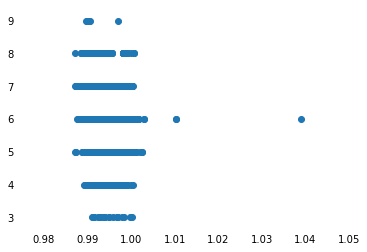

In [47]:
plt.scatter(wine_data["density"], wine_data["quality"])
ax = plt.gca()
ax.tick_params(bottom = "off", left="off")
spines = ax.spines
for k,s in spines.items():
    s.set_visible(False)
plt.show()

So the slope of the line denisty vs. quality is -90.94 and the r-value i.e. correlation coefficient is --0.3071233127347247, which indicates that when the density of the wine increases the quality decreases by a very small value.

In the next code cells let's calculate the intercept, after which we will be able to predict the quality based on the wine density.

The intercept is just how much higher or lower the average y point is that our predicted value.
We can compute the intercept by using the slope and the mean of the density (x) and quality (y) values -

\begin{equation*}
{b} ={\bar{y} - {m}\bar{x}}
\end{equation*}
_Where m is the slope, b is the intercept, y bar is the mean of the quality column and x bar is the mean of the density column._

#### Instructions
- Calculate the y-intercept that is required to predict the "quality" column (y) using the "density" column (x).
- Assign the result to intercept_density.


In [48]:
intercept_density = wine_data["quality"].mean() - slope_density*wine_data["density"].mean()
print("The Y intercept for the density vs. quality line is {}".format(intercept_density))

The Y intercept for the density vs. quality line is 96.27714457605082


Now that we have computed the slope and the intercept, we can make predictions about the y values from the x values.

In order to do this we will put to use the original formula for a line -

\begin{equation*}
{y} = {mx + b}
\end{equation*}

and substitute the values for m and b, we can then predict y-values for any x-value. This lets us make predictions about the quality of x-values that we've never seen. For example, a wine with a density of .98 isn't in our dataset, but we can make a prediction about what quality a reviewer would assign to a wine with this density.

Depending on how correlated the predictor and the value being predicted are, the predictions may be good or bad.

Let's look at making predictions.

#### Instructions
- Write a function to compute the predicted y-value from a given x-value.
- Use the .apply() method on the "density" column to apply the function to each item in the column. This will compute all the predicted y-values.
- Assign the result to predicted_quality.

In [49]:
def predict_y(x, y):
    #calculate the slope m, where m = cov(x,y)/var(x)
    cov = np.cov(x,y)[0,1]
    m = cov/x.var()
    print("slope = ",m)
    #calculate intercept b = ybar - mxbar
    b = y.mean() - m*x.mean()
    print("Y-Intercept = ", b)
    y_pred = m*x+b
    
    return y_pred
    
predicted_quality = predict_y(wine_data["density"], wine_data["quality"])
predicted_quality.head()
wine_data["density"].describe()
    

slope =  -90.9423999421
Y-Intercept =  96.2771445761


count    4898.000000
mean        0.994027
std         0.002991
min         0.987110
25%         0.991723
50%         0.993740
75%         0.996100
max         1.038980
Name: density, dtype: float64

Let's plot the predicted line and the actual y

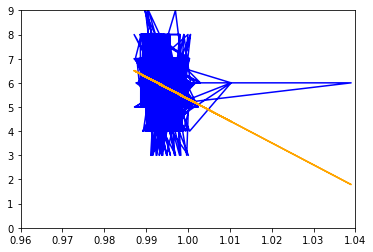

In [50]:
plt.plot(wine_data["density"], wine_data["quality"], c = "blue", label="actual quality")
plt.plot(wine_data["density"], predicted_quality, c = "orange", label="predicted quality")
plt.ylim([0,9])
plt.xlim([0.96,1.04])
plt.show()


How do we explain the above plot?
Well the blue lines depict the actual y-values and it's all over the plot. The regression line makes sense because both the x and y value have a -ve correlation coefficient of -0.3071233127347247 and the slope of the line is -90.94 with an y-intercept of 96.27714457605082.

We know to calculate the regression line manually, fortunately there's an easier way to accomplish this, by using a function from the scipy framework.

The linregress function makes it simple to do linear regression.

In [51]:
from scipy.stats import linregress

slope, intercept, r_value, p_value, stderr_slope = linregress(wine_data["density"], wine_data["quality"])

print("Slope = {}, y-intercept = {}, correlation coefficient = {}, p value = {}, std err = {}".format(slope, intercept, r_value, p_value, stderr_slope ))

Slope = -90.94239994213798, y-intercept = 96.27714457605155, correlation coefficient = -0.3071233127347297, p value = 1.7279878711663e-107, std err = 4.027348178954


Now that we know a simpler way to do linear regression, let's look at how to grade our regresison, if it is good or bad.
- We can plot our line and aour actual values (see above plot), and see how far apart they are on the y-axis.
- We can also compute the distance between each prediction and the actual value, the distance is called the residuals.
- if we add up the sum of the squared residuals, we can get a good error estimate for our line.
- We have to add the squared residuals, because just like differences from the mean, the residuals add upto 0 if they aren't squared.

To put it in math terms , the sum of the squared residuals can be represented as follows -

\begin{equation*}
{RSS} = {\sum_{i=1}^{n}(yi - \hat{yi})^2}
\end{equation*}

_Where the variable_

\begin{equation*}
{\hat{yi}}
\end{equation*}
_is the predicted y value at position i._

In the next code blocks we are going to do this :
- Using the given slope and intercept, calculate the predicted y values.
- Subtract each predicted y value from the corresponding actual y value, square the difference and add all the differences together.
- This will give the sum of squared residuals, assign this value to rss


In [53]:
predicted_y = np.asarray([slope * x + intercept for x in wine_data["density"]])
residuals = (wine_data["quality"] - predicted_y)**2
rss = sum(residuals)
print("Sum of residuals is {}".format(rss))

Sum of residuals is 3478.689469688176


- We can dervice the standard error from the sum of squared residuals. The standard errod is similar to the standard deviation, but it tries to make an estimate for the whole population of y-values. Even the ones we haven't observed yet.

- The standard error lets us quickly determine how good or bad a linear model is at prediction.

- The equation for standard error is 

\begin{equation*}
{E} = {\sqrt RSS/(n-2)} 
\end{equation*}

- The sum of squared errors is divided by the number of y-points minus two, an then take the square root.
- The 2 is subtracted to account for the whole population.  

In the next code blocks we will look at calculating the standar errors -
- Calculate the standard error using the above formula.
- Calculate what proportion of actual y values are within 1 standard error of the predicted y value. Assign the result to within_one.
- Calculate what proportion of actual y values are within 2 standard errors of the predicted y value. Assign the result to within_two.
- Calculate what proportion of actual y values are within 3 standard errors of the predicted y value. Assign the result to within_three.
- Assume that "within" means "up to and including", so be sure to count values that are exactly 1, 2, or 3 standard errors away.

In [62]:
stderr = (rss/(len(wine_data["quality"]) - 2))**(1/2)
print("Standard Error = {}".format(stderr))

def within_percentage(y, predicted_y, error_count, std_err):
    within = std_err*error_count
    
    diff = abs(y-predicted_y)
    lower_diff = [d for d in diff if d <= within]
    proportion = len(lower_diff)/len(y)
    return proportion

within_one = within_percentage(wine_data["quality"], predicted_y, 1, stderr)
within_two = within_percentage(wine_data["quality"], predicted_y, 2, stderr)
within_three = within_percentage(wine_data["quality"], predicted_y, 3, stderr)

print("The proportion of values within 1 standard error is {}.".format(within_one))
print("The proportion of values within 2 standard error is {}.".format(within_two))
print("The proportion of values within 3 standard error is {}.".format(within_three))


Standard Error = 0.8429214910361993
The proportion of values within 1 standard error is 0.6845651286239282.
The proportion of values within 2 standard error is 0.9356880359330338.
The proportion of values within 3 standard error is 0.9936708860759493.
